## Part II - Train and evaluate the model

####  Required Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing an ipynb file from another ipynb file
!pip install ipynb

In [3]:
# Importing functions from another jupyter notebook
!pip install nbimporter

In [4]:
%run GlobalConfig.ipynb

Setting global variables...


#### Load the Data

In [5]:
import nbimporter
import loader_nb
import model_selection_helper_nb

loader = loader_nb.UrlDatasetLoader()

init Loader notebook


In [6]:
df = loader.load_data()

In [7]:
X, y = loader.prepare_data(df)

#### Split the Data

In [8]:
help(loader.train_test_split)

Help on method train_test_split in module loader_nb:

train_test_split(X, y, test_size, random_state, anomaly_detection=True) method of loader_nb.UrlDatasetLoader instance
    This is a convenience method to train test split and have an option to perform anomaly detection or not after the split.
    
    Read more in sklearn.model_selection.train_test_split
    
    Parameters
    ----------
    anomaly_detection: True to perform unsupervised anomaly detection using Isolation Forest.



In [9]:
X_train, X_test, y_train, y_test = loader.train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE)

The X_train, y_train shape:
(25694, 51)
(25694,)
The shape after unsupervised anomaly detection:
(25437, 51)
(25437,)
The X_test, y_test shape:
(11013, 51)
(11013,)
The shape after unsupervised anomaly detection:
(10902, 51)
(10902,)


#### Train models with Hyperparameter optimization

Load the models and parameters to Train.

In [10]:
models_to_train = loader.get_models_to_train()
parameters_to_train = loader.get_parameters_to_train(is_best_params=False)

Tune Hyperparameters for Classification Machine Learning Algorithms

In [11]:
model_selection_helper = model_selection_helper_nb.ModelSelectionHelper(models_to_train, parameters_to_train)

init model selection helper notebook


In [12]:
%%time

model_selection_helper.fit(X_train, y_train, cv=5, scoring='accuracy', verbose=2)

---------------------------------------------------------------------------
RandomForestClassifier
Fitting 5 folds for each of 96 candidates, totalling 480 fits
best_params_:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 150}
best_score_:  0.9372566401222503
---------------------------------------------------------------------------
DecisionTreeClassifier
Fitting 5 folds for each of 32 candidates, totalling 160 fits
best_params_:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
best_score_:  0.8867392820891334
---------------------------------------------------------------------------
LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
best_params_:  {'C': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
best_score_:  0.8150332330654166
---------------------------------------------------------------------------
AdaBoostClassifier
Fitting 5 fo

#### Run the models with test data using the best estimator

In [13]:
%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

data = [];
for key in models_to_train.keys():
    
    model = model_selection_helper.get_model_best_estimator(key)
    
    model.fit(X_test, y_test)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print('Classification Report:', key)
    print(classification_report(y_test, y_pred))
        
    data.append([key, acc, f1])

Wall time: 0 ns
Classification Report: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2434
           1       0.94      0.98      0.96      2320
           2       0.99      0.91      0.95      1957
           3       0.87      0.95      0.91      2214
           4       0.98      0.95      0.97      1977

    accuracy                           0.95     10902
   macro avg       0.95      0.95      0.95     10902
weighted avg       0.95      0.95      0.95     10902

Classification Report: DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2434
           1       0.95      0.96      0.95      2320
           2       0.95      0.88      0.92      1957
           3       0.81      0.90      0.85      2214
           4       0.96      0.94      0.95      1977

    accuracy                           0.92     10902
   macro avg       0.92

In [14]:
df_test = pd.DataFrame(data, columns=['Model', 'Accuracy', 'F1-score'])

In [15]:
df_test = df_test.sort_values(by='Accuracy', ascending=False)

#### Results:

In [16]:
df_test

,Model,Accuracy,F1-score
0,RandomForestClassifier,0.950376,0.950739
1,DecisionTreeClassifier,0.919464,0.920220
2,LogisticRegression,0.816639,0.815096
3,AdaBoostClassifier,0.698954,0.691719
4,MultinomialNB,0.618694,0.610399


<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

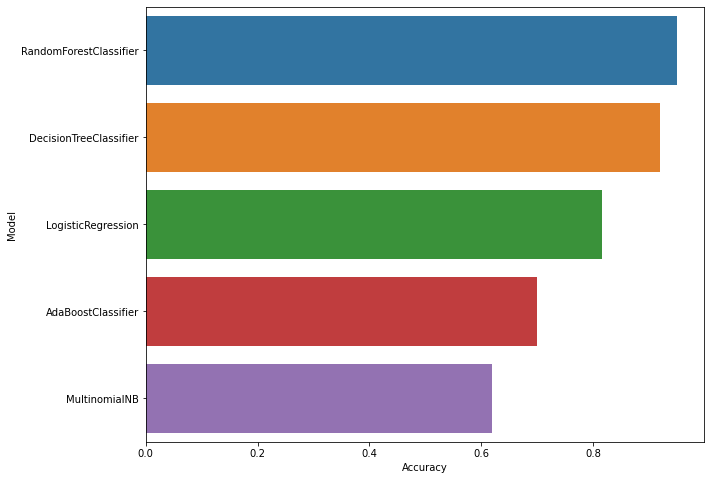

In [17]:
plt.figure(figsize=(10, 8))
sns.barplot(x = df_test['Accuracy'], y = df_test['Model'], data = df_test)